**Lab 6: Ashley Anderson**
<br>**GitHub Link: https://github.com/ashleymaree/Lab_6**

In [2]:
## import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import random
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [59]:
## 1. load data shifting the "V" column to the first column
data = pd.read_csv('NCI60_data.csv', index_col=0)
labels = pd.read_csv('NCI60_labs.csv', index_col=0)

64


Text(0.5, 1.0, 'Number of PCs Versus Cumulative Explained Variance')

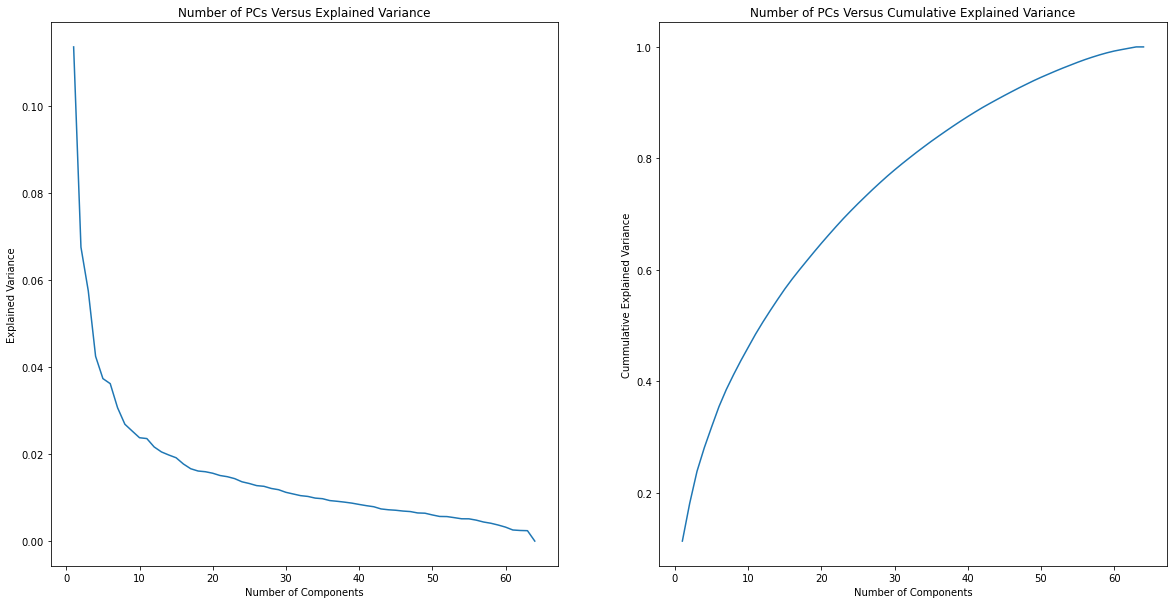

In [63]:
## 2a. PCA analysis
scaler = StandardScaler() ## initialize scaler to be standard scaler
scaler.fit(data) ## calculates means and standard deviations of columns
data_scaled = scaler.transform(data) ## subtracts off mean and divides by SD in order to scale data
pca = PCA() ## initialize PCA
pca.fit(data_scaled) ## fit the PCA model with the scaled data
pca_vector = pca.explained_variance_ratio_ ## figuring out how many principal components we have
print(len(pca_vector)) ## printing total number of PCs
components = np.arange(1,65) ## how do we know it's 65?
plt.figure(figsize = (20,10)) ## make figures wider and taller
plt.subplot(1, 2, 1) ## set-up plots side-by-side
plt.plot(components, pca.explained_variance_ratio_) ## plot each component on the x-axis and the explained variance on the y-axis
plt.xlabel('Number of Components') ## label x-axis
plt.ylabel('Explained Variance') ## label y-axis
plt.title('Number of PCs Versus Explained Variance') ## add title
plt.subplot(1, 2, 2) ## set-up plots side-by-side
plt.plot(components, np.cumsum(pca.explained_variance_ratio_)) ## plot each component on the x-axis and sum up each explained variance for the cumulative values on the y-axis
plt.xlabel('Number of Components') ## label x-axis
plt.ylabel('Cummulative Explained Variance') ## label y-axis
plt.title('Number of PCs Versus Cumulative Explained Variance') ## add title

**2b. How many PCs are produced in the analysis?**
<br> 64 PCs are produced.

**2c. Approximately how many PCs are required to explain 90% of the variance in the data?**
<br> Looking at the cumulative explained variance graph, approximately 45 PCs.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0.5, 1.0, 'PC 1 scores versus PC 3 scores')

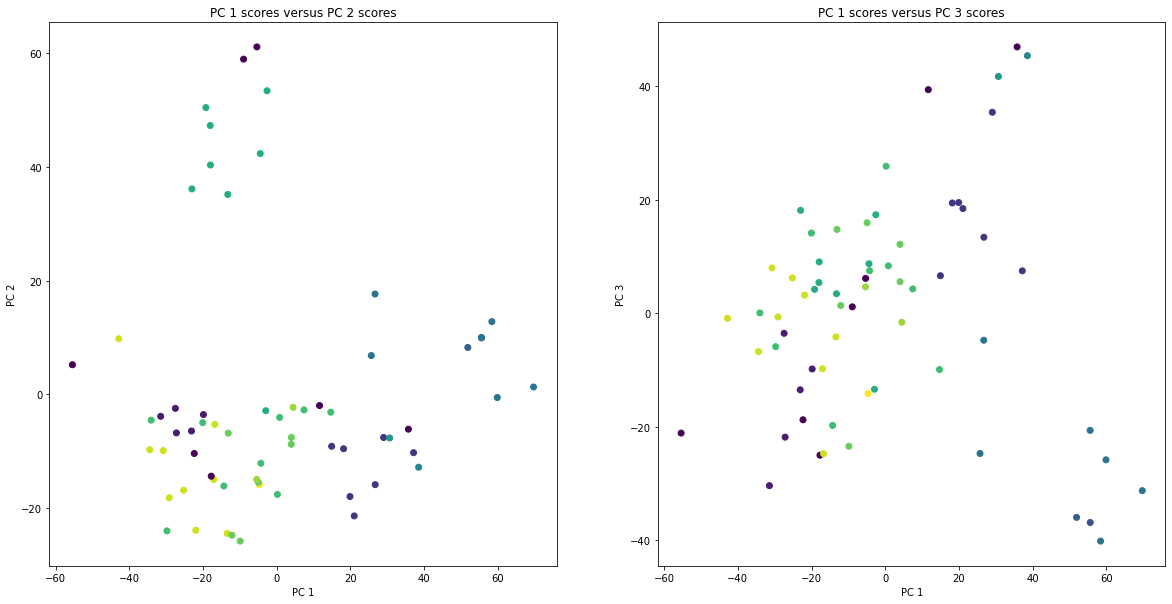

In [66]:
## 3a. Plot the scores on the first versus second PC and the scores on the first versus third PC. 
## Color the scores by cancer type.
pca_scores = pca.fit_transform(data_scaled) 
LE = LabelEncoder() ## initalize label encoder
plt.figure(figsize = (20,10)) ## make figures wider and taller
plt.subplot(1, 2, 1) ## set-up plots side-by-side
plt.scatter(pca_scores[:,0], ## plot PC 1 on x-axis
            pca_scores[:,1], ## plot PC 2 on y-axis
            c = LE.fit_transform(labels)) ## color the points by the cancer types
plt.xlabel('PC 1') ## label x-axis
plt.ylabel('PC 2') ## label y-axis
plt.title('PC 1 scores versus PC 2 scores') ## add title
plt.subplot(1, 2, 2) ## set-up plots side-by-side
plt.scatter(pca_scores[:,0], ## plot PC 1 on x-axis
            pca_scores[:,2], ## plot PC 3 on y-axis
            c = LE.fit_transform(labels)) ## color the points by the cancer types
plt.xlabel('PC 1') ## label x-axis
plt.ylabel('PC 3') ## label y-axis
plt.title('PC 1 scores versus PC 3 scores') ## add title

**3b. Interpret your results.**
<br> For PC 1, the data seems to be a bit tighter together where PC 2 and 3 show a wider variation. The colors are somewhat grouped together; the teal, bright green and darker blues on PC 1 vs. PC 2. The same color groupings appear on the second graph, just slightly more spread out.

Text(0.5, 1.0, 'Hierarchial Clustering with Single Linkage')

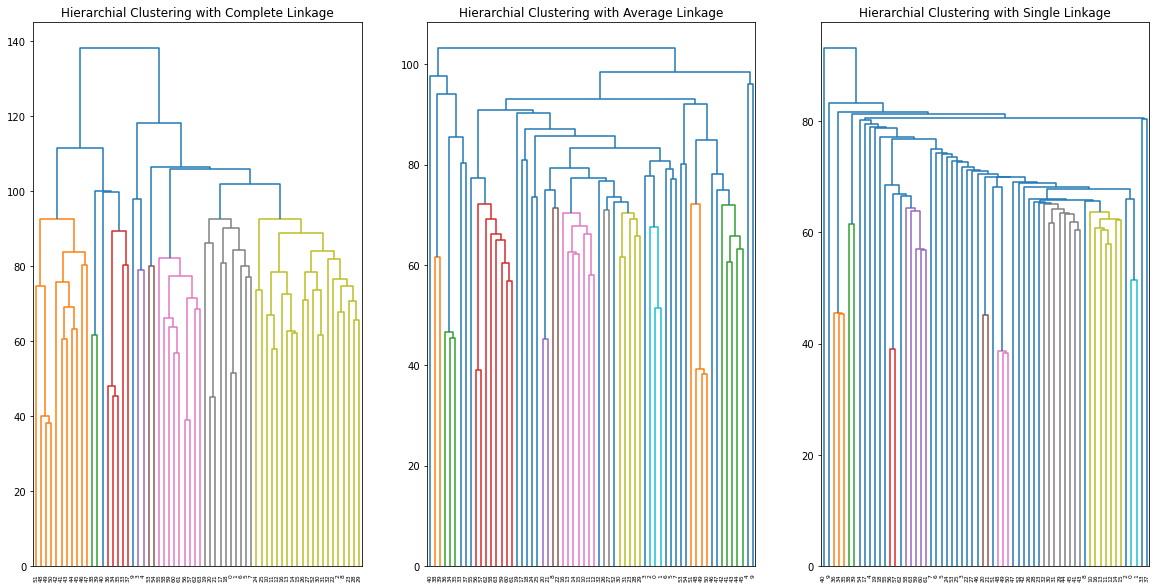

In [44]:
## 4a. Visualize the dendrogram for hierarchical clustering with complete, average, and single linkage. 
## Label the dendrogram with the cancer types.
plt.figure(figsize = (20,10)) ## make figures wider and taller
plt.subplot(1, 3, 1) ## set-up plots side-by-side
dend_1 = shc.dendrogram(shc.linkage(data, ## initate dedrogram plot with data
                                    method = 'complete', ## plot using 'complete' linkage
                                    metric = 'Euclidean'), ## plot using 'Euclidean' distance
                        leaf_rotation = 90) ## rotate sample numbers 90 degrees for better visibility
plt.title('Hierarchial Clustering with Complete Linkage') ## add plot title
plt.subplot(1, 3, 2) ## set-up plots side-by-side
dend_2 = shc.dendrogram(shc.linkage(data, ## initate dedrogram plot with data
                                    method = 'average', ## plot using 'average' linkage
                                    metric = 'Euclidean'), ## plot using 'Euclidean' distance
                        leaf_rotation = 90) ## rotate sample numbers 90 degrees for better visibility
plt.title('Hierarchial Clustering with Average Linkage') ## add plot title
plt.subplot(1, 3, 3) ## set-up plots side-by-side
dend_3 = shc.dendrogram(shc.linkage(data, ## initate dedrogram plot with data
                                    method = 'single', ## plot using 'single' linkage
                                    metric = 'Euclidean'), ## plot using 'Euclidean' distance
                        leaf_rotation = 90) ## rotate sample numbers 90 degrees for better visibility
plt.title('Hierarchial Clustering with Single Linkage') ## add plot title
## Labels of cancer types could not be added due to python/scipy versioning issue (discussed with Nick)

**4b. Does the choice of linkage impact the results?**
<br> Yes. For the single linkage, one group is separated off by itself from the beginning. There is then a much shorter linkage between each of the following groups. With average linkage, the orange and green colored groups are separated on the left and right sides of the dendrogram. For complete linkage there is the largers linkage between each groups. The complete linkage seems to be the most appropriate analysis.

In [53]:
## 5a. Use complete linkage for the remainder of the analysis. Cluster the observations into 4 groups.
cluster = AgglomerativeClustering(n_clusters = 4, ## initiate clustering with 4 clusters
                                    affinity = 'euclidean', ## group using 'Euclidean' distance
                                    linkage = 'complete') ## group using 'complete' linkage
five_a = cluster.fit_predict(data) ## compute cluster centers and predict cluster index for each sample
pd.crosstab(five_a, labels['x']) ## make contingency table of the assignment results

x,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,MCF7A-repro,MCF7D-repro,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
row_0,,,,,,,,,,,,,,
0,4,5,0,0,0,0,0,0,8,8,6,2,8,1
1,0,0,0,1,1,6,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,2,0,7,0,0,0,1,1,0,0,0,0,0,0


**5b. Look at the labels for each of the groups and comment on the success of the clustering.**
<br> Using complete linkage and clustering into 4 groups seems to work pretty well except for breast cancer. The breast cancer cells were split across 3 of the 4 groups. This could be because breast cancer cell types can vary widely. The rest of the cancer cells seem to cluster well by cell type (all CNS cancer cell types in the first cluster, all colon cancer cell types in the fourth cluster, etc.)

Text(0.5, 1.0, 'Hierarchical Clustering on First 5 PC Scores with Complete Linkage')

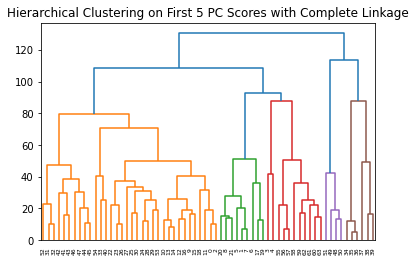

In [69]:
## 6a. Perform hierarchical clustering on the first 5 principal component scores.
six_data = pd.DataFrame(pca_scores[:, 0:5]) ## select data of only the first five PC scores
dend_six = shc.dendrogram(shc.linkage(six_data, ## initate dedrogram plot with data
                                    method = 'complete', ## plot using 'complete' linkage
                                    metric = 'Euclidean'), ## plot using 'Euclidean' distance
                        leaf_rotation = 90) ## rotate sample numbers 90 degrees for better visibility
plt.title('Hierarchical Clustering on First 5 PC Scores with Complete Linkage') ## add plot title

**6b. Comment on the results.**
<br> The data is nicely presented with this method of clustering. Similar to 5a in which 4 groups were selected, we can see that the dendrogram could be cut right around the height of 90 to again come up with 4 groups. No cell type (per the coloring) falls into more than one group.